# Sampling EOPatches
- Creation of 20 eopatchlets with dimentions 256x256 for each eopatch. Each eopatchlet correspond to a different region of the original eopatch.

In [1]:
import os
print(os.getcwd())

/data/lscalambrin/proyecto_integrador/segmentation


In [2]:
import matplotlib.pyplot as plt
from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission, \
    LoadFromDisk, SaveToDisk, EOExecutor
import numpy as np

from functools import partial
from concurrent.futures import ProcessPoolExecutor

from tqdm.auto import tqdm

from fd.sampling import sample_patch, SamplingConfig, prepare_eopatches_paths
from fd.utils import multiprocess

## Configs

In [3]:
save_patch = '/data/lscalambrin/proyecto_integrador/segmentation/pergamino/eopatches'
save_patchlet = '/data/lscalambrin/proyecto_integrador/segmentation/pergamino/patchlets'

positive_examples_config = SamplingConfig(
    bucket_name='bucket-name',
    aws_access_key_id='a',
    aws_secret_access_key='b',
    aws_region='eu-central-1',
    eopatches_location = save_patch,
    output_path=save_patchlet,
    sample_positive=True,
    mask_feature_name='EXTENT',
    buffer=20,
    patch_size=256,
    num_samples=20,
    max_retries=100,
    ### Fraction of area with ground truth data
    fraction_valid=0.5,
    sampled_feature_name='BANDS',
    cloud_coverage=0.05)

/home/lscalambrin/miniconda3/envs/deep_crop/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Positive examples sampling

In [4]:
eopatches_paths = prepare_eopatches_paths(positive_examples_config)

In [6]:
process_fn = partial(sample_patch, sampling_config=positive_examples_config)

#### Note: 
- Message "Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number:" means that for some eopatches there is not enough extent mask on the region to generate a valid eopatchlet. For example, for Pergamino shape file there are some eopatches with no extent at all, so it will be imposible to generate a decent eopatchlet to train the net. That is the reason no eopatchlets are generated for those eopatches.

In [7]:
_ = multiprocess(process_fun=process_fn, arguments=eopatches_paths, max_workers=2)

  0%|          | 0/32 [00:00<?, ?it/s]

Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number: 0
Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number: 1
Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number: 2
Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number: 3
Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number: 4
Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number: 5
Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for patchlet number: 6
Could not determine an area with good enough ratio of valid sampled pixels (= enough ground truth data) for pat

### Plot of patchlets from the same eopatch

Text(0.5, 1.0, 'TCI: patchlet_10, date 6')

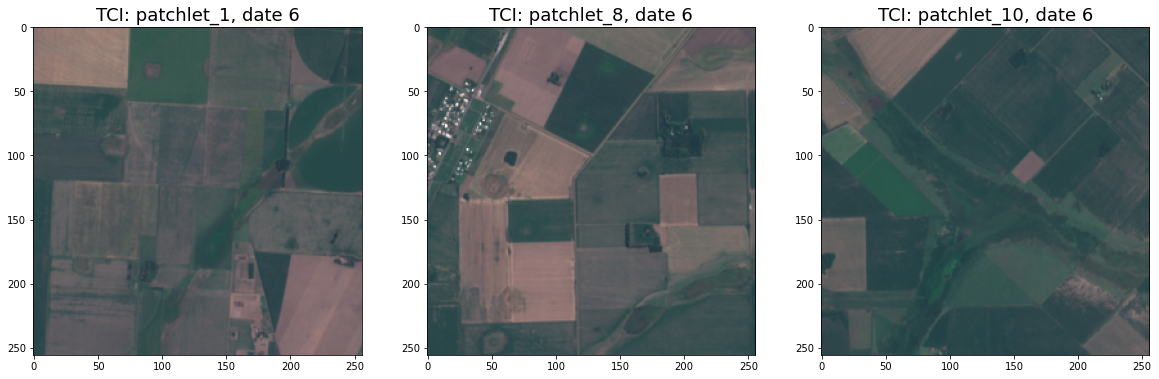

In [7]:
save_patchlet = '/data/lscalambrin/proyecto_integrador/segmentation/pergamino/patchlets'
### idx: eopatch index
idx = 19

date_idx = 6

### idx_2: eopatchlet index
idx_2 = 1

fig = plt.figure(figsize=(20,8))

eopatch = EOPatch.load(save_patchlet+f'/eopatch_{idx}_{idx_2}', lazy_loading=True)
ax = plt.subplot(1, 3, 1)
plt.imshow(np.clip(eopatch.data['BANDS'][date_idx][..., [3, 2, 1]] * 3.5/10000, 0, 1))
# plt.imshow(np.clip(eopatch.data['BANDS'][date_idx][..., [3, 2, 1]] * 3.5, 0, 1))
ax.set_title(f'TCI: patchlet_{idx_2}, date {date_idx}', size=18)

idx_2 = 8
eopatch = EOPatch.load(save_patchlet+f'/eopatch_{idx}_{idx_2}', lazy_loading=True)
ax = plt.subplot(1, 3, 2)
plt.imshow(np.clip(eopatch.data['BANDS'][date_idx][..., [3, 2, 1]] * 3.5/10000, 0, 1))
# plt.imshow(np.clip(eopatch.data['BANDS'][date_idx][..., [3, 2, 1]] * 3.5, 0, 1))
ax.set_title(f'TCI: patchlet_{idx_2}, date {date_idx}', size=18)

idx_2 = 10
eopatch = EOPatch.load(save_patchlet+f'/eopatch_{idx}_{idx_2}', lazy_loading=True)
ax = plt.subplot(1, 3, 3)
plt.imshow(np.clip(eopatch.data['BANDS'][date_idx][..., [3, 2, 1]] * 3.5/10000, 0, 1))
# plt.imshow(np.clip(eopatch.data['BANDS'][date_idx][..., [3, 2, 1]] * 3.5, 0, 1))
ax.set_title(f'TCI: patchlet_{idx_2}, date {date_idx}', size=18)